## NN CIFAR10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)

1.10.0


In [5]:

# Load the Dataset

from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)
print("x_test.shape:", x_test.shape)
print("y_train.shape:", y_train.shape)
print("y_test.shape:", y_test.shape)

Using TensorFlow backend.


x_train.shape: (50000, 32, 32, 3)
x_test.shape: (10000, 32, 32, 3)
y_train.shape: (50000, 1)
y_test.shape: (10000, 1)


In [6]:
#Split the dataset to training batch and validation batch

# from sklearn.model_selection import train_test_split

# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)

# print('x_train shape:', x_train.shape)
# print('x_val shape:', x_val.shape)
# print('y_train shape:', y_train.shape)
# print('y_val shape:', y_val.shape)

In [7]:
#compile an 8-layer dense NN as the baseline

from keras.models import Sequential
from keras.layers import Dense, Flatten

img_size, img_channels = x_train.shape[1], x_train.shape[3]
nb_classes = 10
print('img_size:', img_size)
print('img_channels:', img_channels)
print('nb_classes:', nb_classes)



img_size: 32
img_channels: 3
nb_classes: 10


## Test 1 - Based NN

In [8]:
baseline = Sequential()
# flatten our input into an 1-D array
baseline.add(Flatten(input_shape=(img_size, img_size, img_channels)))
# hidden layers
for i in range(8):
    baseline.add(Dense(512, activation='relu'))
# output layer
baseline.add(Dense(nb_classes, activation='softmax'))

baseline.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
__________

In [9]:

from keras.utils.vis_utils import plot_model

plot_model(baseline, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [6]:
# compile model
# baseline.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

baseline.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = baseline.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 59s 1ms/step - loss: 2.0707 - acc: 0.1850 - val_loss: 1.9881 - val_acc: 0.2112
Epoch 2/50
50000/50000 [==============================] - 62s 1ms/step - loss: 1.9007 - acc: 0.2725 - val_loss: 1.8082 - val_acc: 0.3076
Epoch 3/50
50000/50000 [==============================] - 58s 1ms/step - loss: 1.8066 - acc: 0.3238 - val_loss: 1.7752 - val_acc: 0.3263
Epoch 4/50
50000/50000 [==============================] - 59s 1ms/step - loss: 1.7353 - acc: 0.3593 - val_loss: 1.6862 - val_acc: 0.3836
Epoch 5/50
50000/50000 [==============================] - 59s 1ms/step - loss: 1.6800 - acc: 0.3878 - val_loss: 1.6756 - val_acc: 0.3885
Epoch 6/50
50000/50000 [==============================] - 59s 1ms/step - loss: 1.6320 - acc: 0.4079 - val_loss: 1.5853 - val_acc: 0.4268
Epoch 7/50
50000/50000 [==============================] - 60s 1ms/step - loss: 1.6032 - acc: 0.4199 - val_loss: 1.6167 - val_acc

In [7]:
# Save the training
baseline.save("baseline.h5py")

In [9]:
score = baseline.evaluate(x_test, y_test, verbose=0)
print('Test loss: %.3f' % score[0])
print('Test accuracy: %.3f' % score[1])

Test loss: 1.721
Test accuracy: 0.459


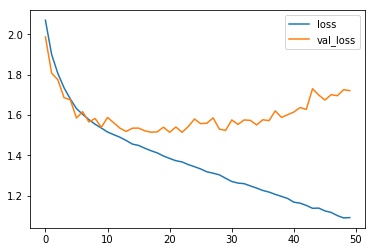

In [10]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

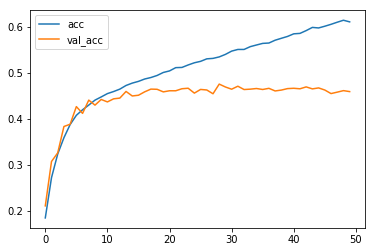

In [11]:
# Plot accuracy per iteration
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[554  78  70  36  44   7  26  41  92  52]
 [ 54 657  10  46  19  13  16  20  43 122]
 [ 71  39 339 123 139  57 125  74  19  14]
 [ 31  34  90 384  74 133 116  62  33  43]
 [ 60  22 175  94 363  30 129 100  17  10]
 [ 19  20  95 292  71 274  81  89  35  24]
 [  9  32 115 135 114  49 489  29  13  15]
 [ 32  35  52  89 132  45  41 499  13  62]
 [154 107  23  37  26  14  10  19 537  73]
 [ 35 258   9  60  17   9  22  48  44 498]]


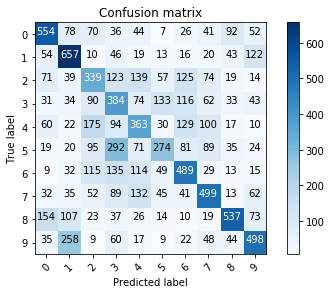

In [12]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = baseline.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

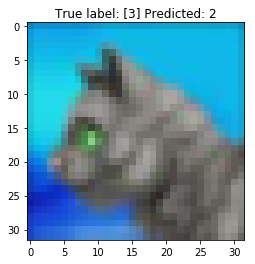

In [13]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

## Test 2 - Optimized Architecture
    One way to improve the testing performance is to fine-tune the NN architecture. To avoid overfitting, we can reduce the model complexity by using 
    fewer layers and/or decreasing the number of neurons in a layer.

In [6]:
baseline2 = Sequential()

# flatten our input into a single dimension array
baseline2.add(Flatten(input_shape=(img_size, img_size, img_channels)))
# hidden layers
baseline2.add(Dense(512, activation='relu'))
baseline2.add(Dense(256, activation='relu'))
baseline2.add(Dense(64, activation='relu'))
baseline2.add(Dense(32, activation='relu'))
# output layer
baseline2.add(Dense(nb_classes, activation='softmax'))

baseline2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_12 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_14 (Dense)             (None, 10)                330       
Total params: 1,723,562
Trainable params: 1,723,562
Non-trainable params: 0
_________________________________________________________________


In [8]:
# compile model
# baseline2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

baseline2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = baseline2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 35s 690us/step - loss: 1.9467 - acc: 0.2788 - val_loss: 1.7727 - val_acc: 0.3571
Epoch 2/25
50000/50000 [==============================] - 34s 671us/step - loss: 1.7413 - acc: 0.3727 - val_loss: 1.6768 - val_acc: 0.4044
Epoch 3/25
50000/50000 [==============================] - 34s 674us/step - loss: 1.6425 - acc: 0.4097 - val_loss: 1.5797 - val_acc: 0.4378
Epoch 4/25
50000/50000 [==============================] - 34s 685us/step - loss: 1.5810 - acc: 0.4327 - val_loss: 1.6168 - val_acc: 0.4215
Epoch 5/25
50000/50000 [==============================] - 34s 678us/step - loss: 1.5404 - acc: 0.4505 - val_loss: 1.5531 - val_acc: 0.4382
Epoch 6/25
50000/50000 [==============================] - 34s 680us/step - loss: 1.5017 - acc: 0.4619 - val_loss: 1.5446 - val_acc: 0.4472
Epoch 7/25
50000/50000 [==============================] - 34s 673us/step - loss: 1.4763 - acc: 0.4703 - val_loss: 1.

In [9]:
# Save the training
baseline2.save("baseline2.h5py")

In [10]:
# Showing the score

score = baseline2.evaluate(x_test, y_test, verbose=0)
print('Test loss: %.3f' % score[0])
print('Test accuracy: %.3f' % score[1])

Test loss: 1.456
Test accuracy: 0.500


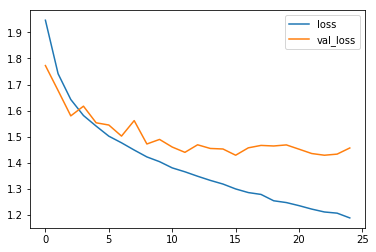

In [11]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

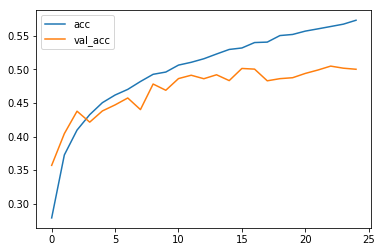

In [12]:
# Plot accuracy per iteration
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[618  16  40  19  50  22  31  25 112  67]
 [ 50 532  10  24  14  22  23  24  94 207]
 [ 93  19 271  83 196  74 170  51  20  23]
 [ 27   9  52 290  80 243 181  37  33  48]
 [ 46   9  67  60 520  48 166  47  21  16]
 [ 28   7  63 173  81 426 108  61  29  24]
 [ 14   7  23  67 122  57 662  24   7  17]
 [ 41   9  50  68 147  87  51 457  19  71]
 [142  36  12  26  38  22  17  11 624  72]
 [ 37 116  11  48  27  26  29  36  67 603]]


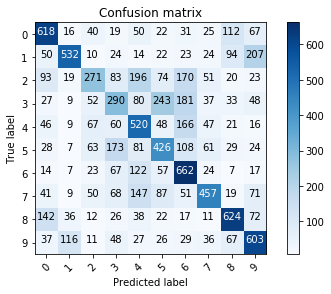

In [13]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = baseline2.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Do these results make sense?
# It's easy to confuse 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

## Test 3 - Weight Decay L2 Norm


In [6]:
from keras.regularizers import l2

model_l2 = Sequential()
# flatten our input into a single dimension array
model_l2.add(Flatten(input_shape=(img_size, img_size, img_channels)))

# hidden layers
l2_alpha = 0.0005
for i in range(8):
    # penalize the L2-norm of the weight matrix 
    model_l2.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_alpha)))
# output layer
model_l2.add(Dense(nb_classes, activation='softmax', kernel_regularizer=l2(l2_alpha)))

model_l2.summary()

In [6]:
# compile model
# model_l2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_l2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model_l2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
__________

In [30]:
# compile model
# model_l2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model_l2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model_l2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100)

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 78s 2ms/step - loss: 2.2519 - acc: 0.1841 - val_loss: 2.0554 - val_acc: 0.2090
Epoch 2/40
50000/50000 [==============================] - 76s 2ms/step - loss: 2.0495 - acc: 0.2067 - val_loss: 2.0184 - val_acc: 0.2130
Epoch 3/40
50000/50000 [==============================] - 77s 2ms/step - loss: 2.0120 - acc: 0.2191 - val_loss: 1.9846 - val_acc: 0.2187
Epoch 4/40
50000/50000 [==============================] - 76s 2ms/step - loss: 1.9803 - acc: 0.2307 - val_loss: 1.9830 - val_acc: 0.2289
Epoch 5/40
50000/50000 [==============================] - 76s 2ms/step - loss: 1.9174 - acc: 0.2724 - val_loss: 1.9148 - val_acc: 0.2860
Epoch 6/40
50000/50000 [==============================] - 77s 2ms/step - loss: 1.8809 - acc: 0.2993 - val_loss: 1.9144 - val_acc: 0.2985
Epoch 7/40
50000/50000 [==============================] - 76s 2ms/step - loss: 1.8706 - acc: 0.3094 - val_loss: 1.8635 - val_acc

In [31]:
# Save the training
model_l2.save("model_l2.h5py")

In [32]:
# Showing the score

score = model_l2.evaluate(x_test, y_test, verbose=0)
print('Test loss: %.3f' % score[0])
print('Test accuracy: %.3f' % score[1])

Test loss: 1.769
Test accuracy: 0.385


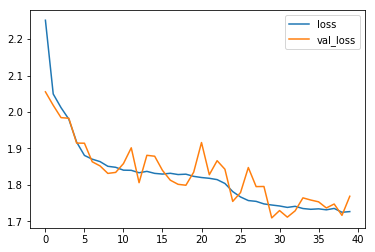

In [33]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

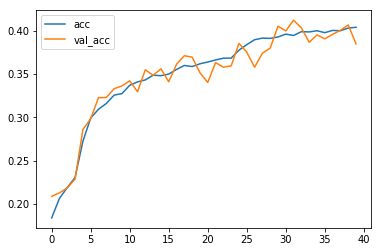

In [34]:
# Plot accuracy per iteration
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[539  26  29  42   6  12  11  67 136 132]
 [ 38 415   2  51   3  10  10  25  97 349]
 [167  31  67 129 128 120  60 214  25  59]
 [ 59  38  49 292  15 269  41 136  40  61]
 [ 76   9  44 118 227 108  64 284  23  47]
 [ 48  24  29 223  36 366  17 161  58  38]
 [ 19  32  24 248 127 143 261  92  18  36]
 [ 58  21  21  76  20  81   6 580  27 110]
 [221  52   7  47   0  18   2  18 507 128]
 [ 43 135   2  41   2   8  11  58 106 594]]


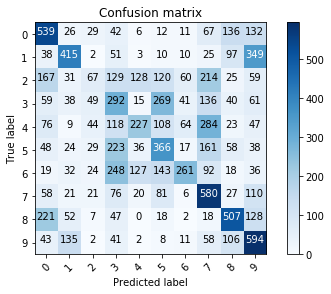

In [35]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model_l2.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

## Test 4 - Batch Normalization

    The  L2 -norm penalties reduces the gap between the training and validation loss. However, the testing accuracy is not improved.
    The idea of batch normalization is to explicitly force the activations of each layer to take on a unit Gaussian distribution over a batch of training examples.
    

In [10]:
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.constraints import maxnorm

model_bn = Sequential()

# flatten our input into a single dimension array
model_bn.add(Flatten(input_shape=(img_size, img_size, img_channels)))


# hidden layers
for i in range(8):
    model_bn.add(Dense(512))
    # add BatchNormalization after summation sublayer and before activation sublayer
    model_bn.add(BatchNormalization())
    model_bn.add(Activation('relu'))
# output layer
model_bn.add(Dense(nb_classes, activation='softmax'))

model_bn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
__________

In [12]:
from keras.utils.vis_utils import plot_model

plot_model(model_bn, to_file='model_bn.png', show_shapes=True, show_layer_names=True)

In [54]:
model_bn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model_bn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 65s 1ms/step - loss: 1.7882 - acc: 0.3634 - val_loss: 1.8737 - val_acc: 0.3373
Epoch 2/50
50000/50000 [==============================] - 62s 1ms/step - loss: 1.5921 - acc: 0.4356 - val_loss: 1.9136 - val_acc: 0.3222
Epoch 3/50
50000/50000 [==============================] - 63s 1ms/step - loss: 1.4960 - acc: 0.4742 - val_loss: 1.5728 - val_acc: 0.4405
Epoch 4/50
50000/50000 [==============================] - 65s 1ms/step - loss: 1.4244 - acc: 0.4968 - val_loss: 1.6057 - val_acc: 0.4257
Epoch 5/50
50000/50000 [==============================] - 65s 1ms/step - loss: 1.3534 - acc: 0.5251 - val_loss: 1.5612 - val_acc: 0.4398
Epoch 6/50
50000/50000 [==============================] - 65s 1ms/step - loss: 1.2990 - acc: 0.5471 - val_loss: 1.5694 - val_acc: 0.4548
Epoch 7/50
50000/50000 [==============================] - 65s 1ms/step - loss: 1.2393 - acc: 0.5648 - val_loss: 1.4412 - val_acc

In [55]:
# Save the training
model_bn.save("model_bn.h5py")

In [56]:
# Showing the score

score = model_bn.evaluate(x_test, y_test, verbose=0)
print('Test loss: %.3f' % score[0])
print('Test accuracy: %.3f' % score[1])

Test loss: 1.957
Test accuracy: 0.538


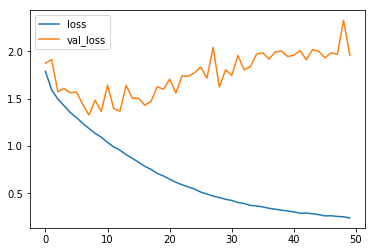

In [57]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

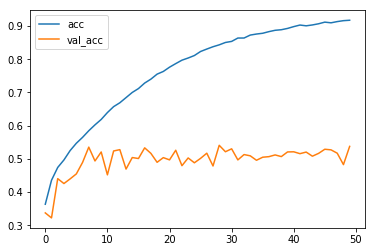

In [58]:
# Plot accuracy per iteration
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[680  38  34  36  14  23  24  15  69  67]
 [ 43 666  22  26   6  19  12  17  51 138]
 [106  19 390 138  76 116  71  36  22  26]
 [ 30  30  62 461  38 228  63  26  24  38]
 [ 58  14 118 133 378  99 115  43  22  20]
 [ 22   8  51 243  34 510  43  50  19  20]
 [ 17  20  68 139  54  94 567   8  13  20]
 [ 36  17  54 101  57 136  18 531   6  44]
 [179  76  15  16  13  32  13   8 576  72]
 [ 46 171  13  38   7  25  20  24  39 617]]


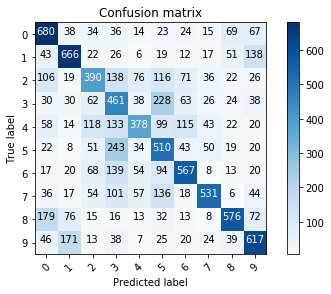

In [59]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model_bn.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

## Test 5 - Dropout
    The key idea of dropout is to randomly drop some units from the NN when processing a batch in training. This forces each neuron to learn to operate by its own instead of relying on other neurons. 

In [9]:
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model_drop = Sequential()

# flatten our input into a single dimension array
model_drop.add(Flatten(input_shape=(img_size, img_size, img_channels)))

# hidden layers
drop_rate = 0.2
for i in range(8):
    model_drop.add(Dense(512))
    model_drop.add(BatchNormalization())
    model_drop.add(Activation('relu'))
    # dropout neurons randomly
    model_drop.add(Dropout(drop_rate))
# output layer
model_drop.add(Dense(nb_classes, activation='softmax'))

model_drop.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_37 (Dense)             (None, 512)               1573376   
_________________________________________________________________
batch_normalization_9 (Batch (None, 512)               2048      
_________________________________________________________________
activation_9 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 512)               262656    
_________________________________________________________________
batch_normalization_10 (Batc (None, 512)               2048      
__________

In [6]:
model_drop.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model_drop.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 73s 1ms/step - loss: 1.9297 - acc: 0.3135 - val_loss: 1.8228 - val_acc: 0.3502
Epoch 2/30
50000/50000 [==============================] - 71s 1ms/step - loss: 1.7012 - acc: 0.3985 - val_loss: 1.6155 - val_acc: 0.4111
Epoch 3/30
50000/50000 [==============================] - 67s 1ms/step - loss: 1.6196 - acc: 0.4294 - val_loss: 1.6424 - val_acc: 0.4203
Epoch 4/30
50000/50000 [==============================] - 67s 1ms/step - loss: 1.5594 - acc: 0.4520 - val_loss: 1.5480 - val_acc: 0.4464
Epoch 5/30
50000/50000 [==============================] - 68s 1ms/step - loss: 1.5032 - acc: 0.4718 - val_loss: 1.5648 - val_acc: 0.4406
Epoch 6/30
50000/50000 [==============================] - 68s 1ms/step - loss: 1.4567 - acc: 0.4913 - val_loss: 1.7753 - val_acc: 0.3891
Epoch 7/30
50000/50000 [==============================] - 68s 1ms/step - loss: 1.4177 - acc: 0.5041 - val_loss: 1.4647 - val_acc

In [7]:
# Save the training
model_drop.save("model_drop.h5py")

In [8]:
# Showing the score

score = model_drop.evaluate(x_test, y_test, verbose=0)
print('Test loss: %.3f' % score[0])
print('Test accuracy: %.3f' % score[1])

Test loss: 1.431
Test accuracy: 0.521


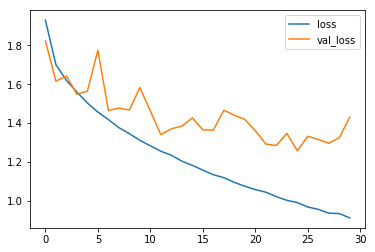

In [9]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

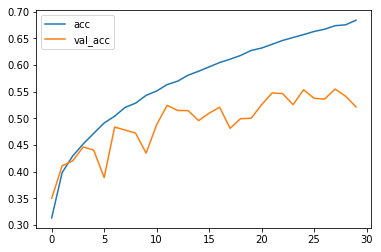

In [10]:
# Plot accuracy per iteration
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[612  47   3  63  16  19  16  63  50 111]
 [ 24 658   4  29   6   9  13   9  30 218]
 [118  20 124 135 141 163 108 135  18  38]
 [ 22  15  13 384  30 272  86  95   9  74]
 [ 53   6  22 101 388  85 117 172  21  35]
 [ 16   9   3 195  39 542  44 110  10  32]
 [  6  15  14 112  59  96 605  44   6  43]
 [ 38   5   1  58  36  82  20 686   5  69]
 [201  86   1  38   6  30  12  22 462 142]
 [ 30 109   0  37   3  16  11  27  13 754]]


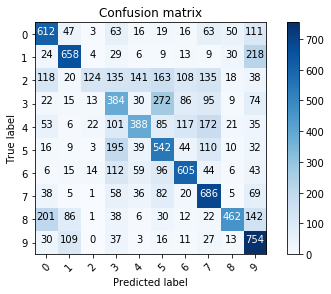

In [11]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model_drop.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [1]:
# We get a much better learning curve and improved testing accuracy. The dropout network requires more epochs to train.

## Test 6 - Deep Neural Network

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
print(tf.__version__)

1.10.0


In [16]:

import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.regularizers import l2
from keras.callbacks import LearningRateScheduler
import numpy as np


#loading the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
# changing the lables to one-hot-encoded
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

#learning rate
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate

weight_decay = 1e-4

model_dnn = Sequential()

# flatten our input into a single dimension array
model_dnn.add(Flatten(input_shape=x_train.shape[1:]))


# hidden layers
# model_dnn.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
# model_dnn.add(Activation('elu'))
# model_dnn.add(BatchNormalization())
# model_dnn.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
# model_dnn.add(Activation('elu'))
# model_dnn.add(BatchNormalization())
# model_dnn.add(Dropout(0.2))

model_dnn.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_dnn.add(Activation('elu'))
model_dnn.add(BatchNormalization())
model_dnn.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_dnn.add(Activation('elu'))
model_dnn.add(BatchNormalization())
model_dnn.add(Dropout(0.2))

model_dnn.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_dnn.add(Activation('elu'))
model_dnn.add(BatchNormalization())
model_dnn.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_dnn.add(Activation('elu'))
model_dnn.add(BatchNormalization())
model_dnn.add(Dropout(0.2))

model_dnn.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_dnn.add(Activation('elu'))
model_dnn.add(BatchNormalization())
model_dnn.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_dnn.add(Activation('elu'))
model_dnn.add(BatchNormalization())
model_dnn.add(Dropout(0.3))

model_dnn.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_dnn.add(Activation('elu'))
model_dnn.add(BatchNormalization())
model_dnn.add(Dense(32, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)))
model_dnn.add(Activation('elu'))
model_dnn.add(BatchNormalization())
model_dnn.add(Dropout(0.3))



# output layer
#model_dnn.add(Flatten())
model_dnn.add(Dense(num_classes, activation='softmax'))

model_dnn.summary()

#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_26 (Dense)             (None, 256)               786688    
_________________________________________________________________
activation_22 (Activation)   (None, 256)               0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 256)               1024      
_________________________________________________________________
dense_27 (Dense)             (None, 256)               65792     
_________________________________________________________________
activation_23 (Activation)   (None, 256)               0         
_________________________________________________________________
batch_normalization_23 (Batc (None, 256)               1024      
__________

In [17]:
#training
batch_size = 64
 
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model_dnn.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
r = model_dnn.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=150,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])

Epoch 1/150
781/781 [==============================] - 23s 30ms/step - loss: 2.2497 - acc: 0.2475 - val_loss: 1.8706 - val_acc: 0.3811
Epoch 2/150
781/781 [==============================] - 29s 37ms/step - loss: 1.9521 - acc: 0.3515 - val_loss: 1.7595 - val_acc: 0.4144
Epoch 3/150
781/781 [==============================] - 20s 26ms/step - loss: 1.8721 - acc: 0.3809 - val_loss: 1.6981 - val_acc: 0.4529
Epoch 4/150
781/781 [==============================] - 30s 38ms/step - loss: 1.8287 - acc: 0.4000 - val_loss: 1.6716 - val_acc: 0.4503
Epoch 5/150
781/781 [==============================] - 21s 26ms/step - loss: 1.7931 - acc: 0.4160 - val_loss: 1.6421 - val_acc: 0.4628
Epoch 6/150
781/781 [==============================] - 29s 38ms/step - loss: 1.7698 - acc: 0.4246 - val_loss: 1.6111 - val_acc: 0.4779
Epoch 7/150
781/781 [==============================] - 21s 26ms/step - loss: 1.7509 - acc: 0.4309 - val_loss: 1.5811 - val_acc: 0.4891
Epoch 8/150
781/781 [==============================] - 

Test loss: 1.206
Test accuracy: 0.604


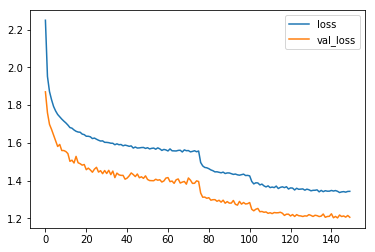

In [18]:
# num_classes = 10
# # changing the lables to one-hot-encoded
# y_train = np_utils.to_categorical(y_train,num_classes)
# y_test = np_utils.to_categorical(y_test,num_classes)

# Save the training
model_dnn.save("model_dnn.h5py")

# Showing the score
score = model_dnn.evaluate(x_test, y_test, verbose=0)
print('Test loss: %.3f' % score[0])
print('Test accuracy: %.3f' % score[1])

# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

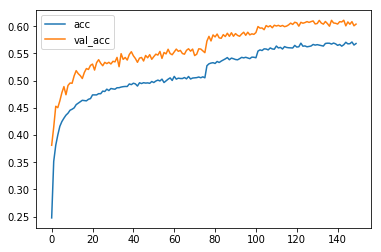

In [19]:
# Plot accuracy per iteration
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[657  34  33  39  22   5  19  21 122  48]
 [ 26 755   9  12   2   5   7   6  56 122]
 [ 89  25 404  70 141  82  93  56  16  24]
 [ 26  17  55 426  49 194 114  59  33  27]
 [ 37  12 101  56 498  37 116 108  26   9]
 [ 12  13  36 202  51 481  73  89  18  25]
 [ 10  14  44  75  64  38 712  12  10  21]
 [ 23  14  26  48  56  66  21 703   9  34]
 [ 74  58   8  15  12  11   8   6 750  58]
 [ 36 175   8  26   8  10  15  25  42 655]]


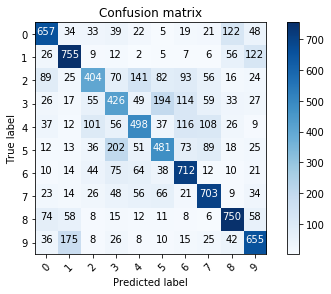

In [20]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools
import numpy as np

#one-hot-encoded to integer
y_test=np.argmax(y_test, axis=1)
y_train=np.argmax(y_train, axis=1)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model_dnn.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

## CNN - Model 1

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten

model_cnn = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model_cnn.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model_cnn.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model_cnn.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model_cnn.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# CONVOLUTIONAL LAYER
model_cnn.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))

# POOLING LAYER
model_cnn.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model_cnn.add(Flatten())

# 512 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model_cnn.add(Dense(512, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model_cnn.add(Dense(10, activation='softmax'))

model_cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        32832     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 7, 7, 64)          65600     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
__________

In [11]:
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model_cnn.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 66s 1ms/step - loss: 1.5516 - acc: 0.4282 - val_loss: 1.3427 - val_acc: 0.5157
Epoch 2/30
50000/50000 [==============================] - 66s 1ms/step - loss: 1.1764 - acc: 0.5809 - val_loss: 1.1284 - val_acc: 0.5976
Epoch 3/30
50000/50000 [==============================] - 66s 1ms/step - loss: 1.0088 - acc: 0.6454 - val_loss: 1.0389 - val_acc: 0.6346
Epoch 4/30
50000/50000 [==============================] - 67s 1ms/step - loss: 0.8901 - acc: 0.6866 - val_loss: 0.9501 - val_acc: 0.6740
Epoch 5/30
50000/50000 [==============================] - 66s 1ms/step - loss: 0.7985 - acc: 0.7188 - val_loss: 0.8785 - val_acc: 0.6980
Epoch 6/30
50000/50000 [==============================] - 67s 1ms/step - loss: 0.7278 - acc: 0.7433 - val_loss: 0.8963 - val_acc: 0.6975
Epoch 7/30
50000/50000 [==============================] - 67s 1ms/step - loss: 0.6577 - acc: 0.7660 - val_loss: 0.8865 - val_acc

In [12]:
# Save the training
model_cnn.save("model_cnn.h5py")

In [14]:
# Showing the score

score = model_cnn.evaluate(x_test, y_test, verbose=0)
print('Test loss: %.3f' % score[0])
print('Test accuracy: %.3f' % score[1])

Test loss: 2.308
Test accuracy: 0.665


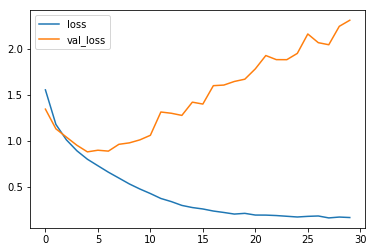

In [15]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

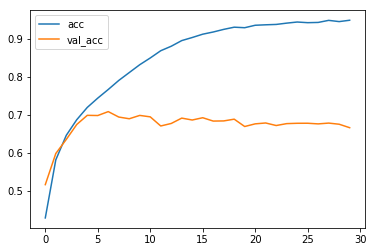

In [16]:
# Plot accuracy per iteration
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[610  29  83  22  35  13  19  20 113  56]
 [ 20 794  10   9   4   6   9  12  34 102]
 [ 48   8 566  60 113  69  66  43  20   7]
 [ 22  11  87 427  93 157  82  76  16  29]
 [ 19   9  65  48 662  37  32  97  21  10]
 [  4   7  82 162  61 530  27  98   7  22]
 [  7   5  72  51  79  32 724   7  11  12]
 [ 11   6  49  52  58  40   7 754   5  18]
 [ 55  34  27  14  14   6   5   6 789  50]
 [ 24  79  17   9   8   7  10  18  29 799]]


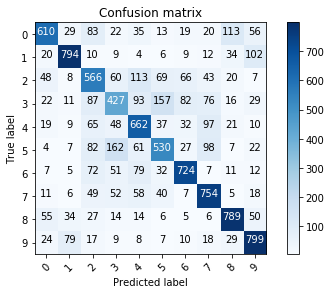

In [17]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model_cnn.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

## CNN - Model 2

In [25]:
from keras.regularizers import l2
from keras.constraints import maxnorm
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, Flatten

from keras.layers.convolutional import Convolution2D, MaxPooling2D

model_cnn2 = Sequential()

# convolutional hidden layers
for i in range(6):
    model_cnn2.add(Convolution2D(32, 3, 3, 
                        input_shape=(img_size, img_size, img_channels), 
                        border_mode='same', activation='relu'))
    if (i + 1) % 2 == 0:
        model_cnn2.add(MaxPooling2D(pool_size=(2, 2), border_mode='same'))
    
print('Output shape of last concolution layers: {0}'.format(model_cnn2.output_shape))
model_cnn2.add(Flatten())

# fully connected hidden layers
for i in range(2):
    model_cnn2.add(Dense(512))
    model_cnn2.add(BatchNormalization())
    model_cnn2.add(Activation('relu'))
    
# output layer
model_cnn2.add(Dense(nb_classes, activation='softmax'))

model_cnn2.summary()

C:\Users\alike\.conda\envs\python-cvcourse\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., activation="relu", padding="same")`
C:\Users\alike\.conda\envs\python-cvcourse\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `MaxPooling2D` call to the Keras 2 API: `MaxPooling2D(pool_size=(2, 2), padding="same")`


Output shape of last concolution layers: (None, 4, 4, 32)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_23 (Conv2D)

In [14]:
model_cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model_cnn2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=30)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 64s 1ms/step - loss: 1.4017 - acc: 0.4984 - val_loss: 2.5778 - val_acc: 0.3226
Epoch 2/30
50000/50000 [==============================] - 63s 1ms/step - loss: 1.0003 - acc: 0.6468 - val_loss: 0.9724 - val_acc: 0.6572
Epoch 3/30
50000/50000 [==============================] - 62s 1ms/step - loss: 0.8477 - acc: 0.7007 - val_loss: 1.5789 - val_acc: 0.4920
Epoch 4/30
50000/50000 [==============================] - 63s 1ms/step - loss: 0.7421 - acc: 0.7375 - val_loss: 0.8853 - val_acc: 0.6939
Epoch 5/30
50000/50000 [==============================] - 63s 1ms/step - loss: 0.6637 - acc: 0.7654 - val_loss: 0.8617 - val_acc: 0.6992
Epoch 6/30
50000/50000 [==============================] - 64s 1ms/step - loss: 0.5962 - acc: 0.7887 - val_loss: 1.3255 - val_acc: 0.5945
Epoch 7/30
50000/50000 [==============================] - 63s 1ms/step - loss: 0.5345 - acc: 0.8108 - val_loss: 1.0567 - val_acc

In [15]:
# Save the training
model_cnn2.save("model_cnn2.h5py")

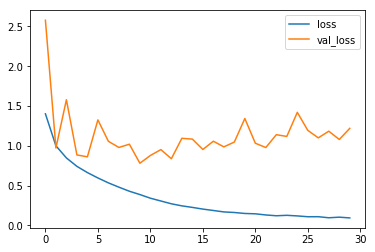

In [16]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

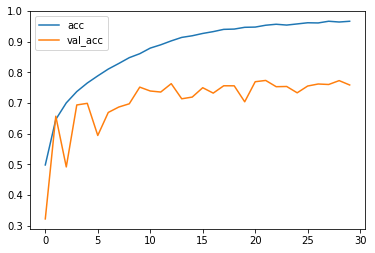

In [17]:
# Plot accuracy per iteration
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[855  10  26   9   5   0   3   6  67  19]
 [ 25 926   2   2   0   0   1   1  14  29]
 [ 89  13 696  42  57  17  28  29  18  11]
 [ 60  14  63 562  51  81  42  65  35  27]
 [ 37   7  46  57 745  12  21  56  10   9]
 [ 25  11  58 191  44 505  17 112  21  16]
 [ 23  10  37  50  44  12 764  10  44   6]
 [ 27   9  19  29  47   4   0 832  14  19]
 [ 63  15   5   3   1   0   1   4 896  12]
 [ 40 105   3   5   2   1   0   7  28 809]]


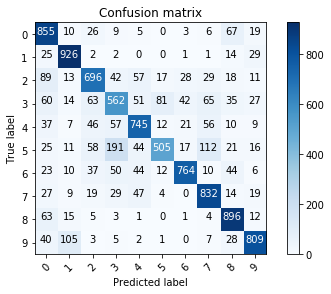

In [18]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model_cnn2.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [24]:
# Compile and Training the data

# from keras.callbacks import EarlyStopping

# #batch_size = 128
# epoch_max = 30
# early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# model_cnn3.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])
# r = model_cnn3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epoch_max, callbacks=[early_stop], verbose=1)

## Deep CNN - Model 3

In [14]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers
from keras.callbacks import LearningRateScheduler
import numpy as np
 
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
# changing the lables to one-hot-encoded
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
 
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()
 
#data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)
 
#training
batch_size = 64
 
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])
r = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=75,\
                    verbose=1,validation_data=(x_test,y_test),callbacks=[LearningRateScheduler(lr_schedule)])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_9 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_10 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
__________

In [20]:
#save to disk
model_json = model.to_json()
with open('model.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model.h5') 
 
#testing
scores = model.evaluate(x_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

10000/10000 [==============================] - 37s 4ms/step

Test result: 86.040 loss: 0.594


In [16]:
# Showing the score

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: %.3f' % score[0])
print('Test accuracy: %.3f' % score[1])

Test loss: 0.594
Test accuracy: 0.860


In [15]:
# Save the training
model.save("model.h5py")

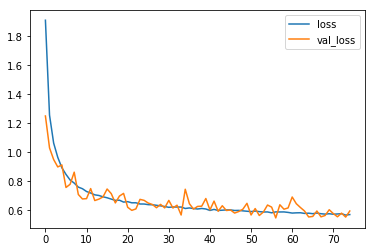

In [17]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

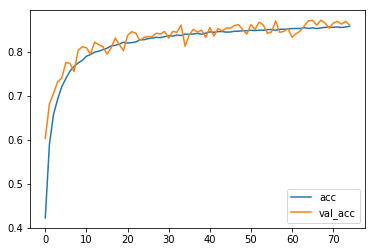

In [18]:
# Plot accuracy per iteration
plt.plot(r.history['acc'], label='acc')
plt.plot(r.history['val_acc'], label='val_acc')
plt.legend()

Confusion matrix, without normalization
[[872  23   5   3   6   0   8   4  40  39]
 [  2 956   0   0   1   0   3   0   4  34]
 [ 47   1 734  20  49  22  90  11  11  15]
 [ 23  12  17 657  49  50 100  36  20  36]
 [  4   3   7   6 876   3  59  33   4   5]
 [  5   8  10  81  34 742  34  62   7  17]
 [  3   2   7   8   5   1 964   3   3   4]
 [  5   2   6   6  28   6  10 927   2   8]
 [ 14  23   0   1   0   0   3   0 933  26]
 [  4  43   0   1   1   0   0   0   8 943]]


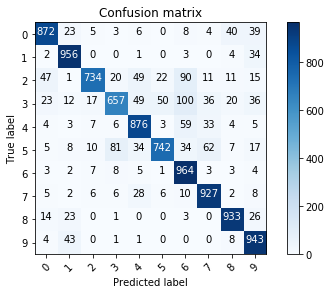

In [23]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [21]:
y_test[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.], dtype=float32)

In [22]:
#CHanging the one-hot-encoded lables to integer format
import numpy as np
y_test=np.argmax(y_test, axis=1)
y_train=np.argmax(y_train, axis=1)
y_test[1]

8